Code Word: DEV

In [18]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import time
from scipy.integrate  import ode, solve_ivp

# Question 1: 
PUMA, SCARA and Stanford Manipulators are moving from A(0.40, 0.06, 0.1) to B(0.40, 0.01, 0.1). Generate desired end-point trajectory. Plot end effector position, velocity and acceleration w.r.t time. 

In [19]:
to = 0
tf = 1
qo = np.array([0.4, 0.06, 0.1])
qf = np.array([0.4, 0.01, 0.1])
vo = np.array([0, 0, 0])
vf = np.array([0, 0, 0])

In [20]:
#Cubic Polynomial Trajectory
def constants_for_cubic_polynomial_trajectory(to, tf, qo, qf, vo, vf):
  qo_x, qo_y, qo_z = qo
  qf_x, qf_y, qf_z = qf
  vo_x, vo_y, vo_z = vo
  vf_x, vf_y, vf_z = vf

  LHS = np.array([[1, to, to^2, to^3],
                  [0, 1, 2*to, 3*((to)^2)],
                  [1, tf, tf^2, tf^3],
                  [0, 1, 2*tf, 3*((tf)^2)]])
  RHS_x = np.array([[qo_x], [vo_x], [qf_x], [vf_x]])
  RHS_y = np.array([[qo_y], [vo_y], [qf_y], [vf_y]])
  RHS_z = np.array([[qo_z], [vo_z], [qf_z], [vf_z]])
  
  A_mat_x = np.linalg.inv(LHS)@RHS_x
  A_mat_y = np.linalg.inv(LHS)@RHS_y
  A_mat_z = np.linalg.inv(LHS)@RHS_z

  return A_mat_x, A_mat_y, A_mat_z

#print(constants_for_cubic_polynomial_trajectory(to, tf, qo, qf, vo, vf))

In [21]:
def end_effector_posveloacc_from_Amat(A_mat_x, A_mat_y, A_mat_z):
  time_vector = np.array(range(0, 10000, 1))/10000

  position_array_x = []
  position_array_y = []
  position_array_z = []

  velocity_array_x = []
  velocity_array_y = []
  velocity_array_z = []

  acceleration_array_x = []
  acceleration_array_y = []
  acceleration_array_z = []

  for t in time_vector: 
    position_x = A_mat_x[0] + A_mat_x[1]*(t) + A_mat_x[2]*(t**2) + A_mat_x[3]*(t**3)
    position_y = A_mat_y[0] + A_mat_y[1]*(t) + A_mat_y[2]*(t**2) + A_mat_y[3]*(t**3)
    position_z = A_mat_z[0] + A_mat_z[1]*(t) + A_mat_z[2]*(t**2) + A_mat_z[3]*(t**3)

    velo_x = A_mat_x[1] + 2*A_mat_x[2]*t + 3*A_mat_x[3]*(t**2)
    velo_y = A_mat_y[1] + 2*A_mat_y[2]*t + 3*A_mat_y[3]*(t**2)
    velo_z = A_mat_z[1] + 2*A_mat_z[2]*t + 3*A_mat_z[3]*(t**2)

    acc_x = 2*A_mat_x[2] + 6*A_mat_x[3]*t
    acc_y = 2*A_mat_y[2] + 6*A_mat_y[3]*t
    acc_z = 2*A_mat_z[2] + 6*A_mat_z[3]*t

    position_array_x.append(position_x)
    position_array_y.append(position_y)
    position_array_z.append(position_z)

    velocity_array_x.append(velo_x)
    velocity_array_y.append(velo_y)
    velocity_array_z.append(velo_z)

    acceleration_array_x.append(acc_x)
    acceleration_array_y.append(acc_y)
    acceleration_array_z.append(acc_z)

  return time_vector, position_array_x, position_array_y, position_array_z, velocity_array_x, velocity_array_y, velocity_array_z, acceleration_array_x, acceleration_array_y, acceleration_array_z

In [22]:
def plot_pos_vs_time(time_vector, position_x, position_y, position_z, labelx, labely, labelz, title):
  plt.plot(time_vector, position_x, label = labelx)
  plt.plot(time_vector, position_y, label = labely)
  plt.plot(time_vector, position_z, label = labelz)

  plt.title(title)

  plt.legend()
  plt.show()

def plot_velo_vs_time(time_vector, velocity_x, velocity_y, velocity_z):
  plt.plot(time_vector, velocity_x, label = 'X Velocity')
  plt.plot(time_vector, velocity_y, label = 'Y Velocity')
  plt.plot(time_vector, velocity_z, label = 'Z Velocity')

  plt.title('Velocity vs Time Plots')

  plt.legend()
  plt.show()

def plot_acc_vs_time(time_vector, acc_x, acc_y, acc_z):
  plt.plot(time_vector, acc_x, label = 'X Acceleration')
  plt.plot(time_vector, acc_y, label = 'Y Acceleration')
  plt.plot(time_vector, acc_z, label = 'Z Acceleration')

  plt.title('Acceleration vs Time Plots')

  plt.legend()
  plt.show()

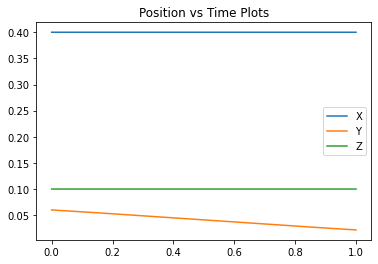

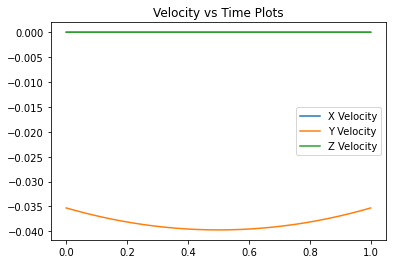

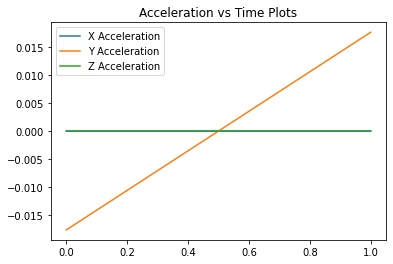

In [23]:
A_mat_x, A_mat_y, A_mat_z = constants_for_cubic_polynomial_trajectory(to, tf, qo, qf, vo, vf)
time_vector, position_array_x, position_array_y, position_array_z, velocity_array_x, velocity_array_y, velocity_array_z, acceleration_array_x, acceleration_array_y, acceleration_array_z = end_effector_posveloacc_from_Amat(A_mat_x, A_mat_y, A_mat_z)
plot_pos_vs_time(time_vector, position_array_x, position_array_y, position_array_z, 'X', 'Y', 'Z', 'Position vs Time Plots')
plot_velo_vs_time(time_vector, velocity_array_x, velocity_array_y, velocity_array_z) # X and Z velocities are overlapping in this case, therefore only one colour will be visible
plot_acc_vs_time(time_vector, acceleration_array_x, acceleration_array_y, acceleration_array_z) # X and Z accelerations are overlapping in this case, therefore only one colour will be visible

# Question 2: 
Pick any one manipulator (your choice) out of Stanford, PUMA, and SCARA. Using the dimensions worked out in Task 1.a of Mid-sem exam (tweak those numbers if need be), then work out the desired trajectories in joint space. Plot these joint trajectories with respect to time. Use this same manipulator for all other tasks.

Let's Implement this for PUMA

In [24]:
#Code Credits: Videh Patel 

def DH2HnJ(Hmat, prismatic=[]):
    #Hmat is the DH parameter matrix
    #prismatic is an array of the joints that are prismatic: Joint corresponding to qi is ith joint
    #All revolute and prismatic axes are assumed to be aligned with the respective z axis

    def d_(k):
        #Returns position vector of ee wrt k-frame in o-frame basis
        return (T[k][:3,:3])@(np.linalg.inv(T[k])@T[n]@(np.matrix([[0],[0],[0],[1]])))[:3,0]
        
    n = len(Hmat)
    T = [np.matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])]  #Array of all absolute Homogeneous Transformations : Has T0_0 at the start (Identity matrix)
    J = []  #Manipulator Jacobian
    for params in Hmat:
        theta, d, a, alpha = np.array(params)[0]
        Ti = np.matrix([ [ np.cos(theta), -np.sin(theta)*np.cos(alpha), np.sin(theta)*np.sin(alpha), a*np.cos(theta)],\
                         [ np.sin(theta), np.cos(theta)*np.cos(alpha), -np.cos(theta)*np.sin(alpha), a*np.sin(theta)],\
                         [ 0            , np.sin(alpha)               , np.cos(alpha)              , d              ],\
                         [ 0            , 0                           , 0                          ,1              ] ], dtype = 'float')
        

        T.append(T[-1]@Ti)

    for i in range(n):
        if (i+1) in prismatic:
            Jv = T[i][:3,:3]@np.matrix([0,0,1]).T
            Jw = np.matrix([0,0,0]).T
        else: #Revolute
            Jw = T[i][:3,:3]@np.matrix([0,0,1]).T
            Jv = np.matrix(np.cross(Jw.T,d_(i).T).T, dtype = 'float')
        
        Ji = np.concatenate((Jv, Jw))
        
        if len(J) == 0:
            J = Ji
        else:
            J = np.concatenate((J,Ji), axis = 1)

        H = T[n]

    return H, J

def PUMA_invkin(p, dimensions):
  l1, l2, l3 = dimensions

  #position of end point
  x, y, z = np.array(p)

  #Inverse kinematics implementation
  theta1 = np.arctan(y/x)
  D = (x**2 + y**2 + (z - l1)**2  - l2**2 - l3**2)/(2*l2*l3)
  theta3 = np.arccos(D)
  theta2 = np.arctan((z - l1)/np.sqrt(x**2 + y**2)) - np.arctan(l3*np.sin(theta3)/(l2 + l3*np.cos(theta3)))

  return theta1, theta2, theta3
  
def PUMA_forwkin_and_J(q, dimensions):
  q1, q2, q3 = q
  l1, l2, l3 = dimensions
  
  Dh = np.matrix([[q1, l1, 0, -np.pi/2],[q2 , 0, -l2, 0],[q3 , 0, -l3, 0]])
  H, J = DH2HnJ(Dh,[])
  #print(J)

  return H[0, -1], H[1, -1], H[2, -1], J

def PUMA_Dmat(m, l):
  m1, m2, m3 = m
  l1, l2, l3 = l
  q1 = sym.Symbol('q1')
  q2 = sym.Symbol('q2')
  q3 = sym.Symbol('q3')
  q1_dot = sym.Symbol('q1_dot')
  q2_dot = sym.Symbol('q2_dot')
  q3_dot = sym.Symbol('q3_dot')
  q1_dotdot = sym.Symbol('q1_dotdot')
  q2_dotdot = sym.Symbol('q2_dotdot')
  q3_dotdot = sym.Symbol('q3_dotdot')

  Jvc1 = np.array([[0, 0, 0],
                   [0, 0, 0], 
                   [0, 0, 0]])
  Jw1 = np.array([[0, 0, 0], 
                  [0, 0, 0],
                  [1, 0, 0]])
  
  Jvc2 = np.array([[(-l2/2)*sym.sin(q1)*sym.cos(q2), (-l2/2)*sym.cos(q1)*sym.sin(q2), 0],
          [(l2/2)*sym.cos(q1)*sym.cos(q2), (-l2/2)*sym.sin(q1)*sym.sin(q2), 0],
          [0, (l2/2)*sym.cos(q2), 0]])
  Jw2 = np.array([[0, 0, 0],
         [0, 1, 0],
         [1, 0, 0]])
  
  Jvc3 = np.array([[-l2*sym.sin(q1)*sym.cos(q2) - (l3/2)*sym.sin(q1)*sym.cos(q3 + q2), -l2*sym.cos(q1)*sym.sin(q2) - (l3/2)*sym.sin(q3 + q2)*sym.cos(q1), (-l3/2)*sym.sin(q3 + q2)*sym.cos(q1)],
                  [l2*sym.cos(q1)*sym.cos(q2) + (l3/2)*sym.cos(q1)*sym.cos(q3 + q2), -l2*sym.sin(q1)*sym.sin(q2) - (l3/2)*sym.sin(q3 + q2)*sym.sin(q1), (-l3/2)*sym.sin(q3 + q2)*sym.sin(q1)],
                  [0, l2*sym.cos(q2) + (l3/2)*sym.cos(q2+q3), (l3/2)*sym.cos(q2+q3)]])
  Jw3 = np.array([[0, 0, 0],
         [0, 1, 1],
         [1, 0, 0]])
  
  D = m1*Jvc1.T*Jvc1 + m2*Jvc2.T*Jvc2 + m3*Jvc3.T*Jvc3 #+ Jw1.T*R1*I1*R1.T*Jw1  + Jw2.T*R2*I2*R2.T*Jw2 + Jw3.T*R3*I3*R3.T*Jw3

  return D

def PUMA_dynamic_equation(m, l):
  l1, l2, l3 = l
  m1, m2, m3 = m
  q1 = sym.Symbol('q1')
  q2 = sym.Symbol('q2')
  q3 = sym.Symbol('q3')
  q = np.array([[q1], [q2], [q3]])
  q1_dot = sym.Symbol('q1_dot')
  q2_dot = sym.Symbol('q2_dot')
  q3_dot = sym.Symbol('q3_dot')
  q_dot = np.array([[q1_dot], [q2_dot], [q3_dot]])
  q1_dotdot = sym.Symbol('q1_dotdot')
  q2_dotdot = sym.Symbol('q2_dotdot')
  q3_dotdot = sym.Symbol('q3_dotdot')
  q_dotdot = np.array([[q1_dotdot], [q2_dotdot], [q3_dotdot]])
  g = 9.8

  n = 3

  D = PUMA_Dmat(m, l)
  
  V = m1*g*l1/2 + m2*g*(l1 + ( l2*sym.sin(q2))/2) + m3*g*(l1 + l2*sym.sin(q2) + (l3/2)*sym.sin(q2 + q3))

  G = np.array([[sym.diff(V, q1)],
                [sym.diff(V, q2)],
                [sym.diff(V, q3)]])
  
  C = [0]*n

  for k in range(n):
    for j in range(n):
      for i in range(n):
        C[k]  = (sym.diff(D[k][j], q[i][0]) + sym.diff(D[k][i], q[j][0]) - sym.diff(D[i][j], q[k][0]))
        C[k] = C[k]/2

  C = np.array(C)

  dynamic_eqn = sym.Array(D@q_dotdot + C@q_dot + G) #np.matmul(D,q_dotdot) + np.matmul(C,q_dot) + G
  return dynamic_eqn, D, C, G

def PUMA_invdynamics(m, l, q, q_dot, torques):
  q1, q2, q3 = q
  q1_dot, q2_dot, q3_dot = q_dot

  eqn, D, C, G = PUMA_dynamic_equation(m, l)

  eqn_numbers = eqn.subs([('q1',q1), ('q2',q2), ('q3',q3), ('q1_dot', q1_dot), ('q2_dot',q2_dot), ('q3_dot',q3_dot)])
  #print(eqn_numbers)

  D_numbers = np.array([[eqn_numbers[0,0].coeff('q1_dotdot'), eqn_numbers[0,0].coeff('q2_dotdot'), eqn_numbers[0,0].coeff('q3_dotdot')],
                [eqn_numbers[1,0].coeff('q1_dotdot'), eqn_numbers[1,0].coeff('q2_dotdot'), eqn_numbers[1,0].coeff('q3_dotdot')],
                [eqn_numbers[2,0].coeff('q1_dotdot'), eqn_numbers[2,0].coeff('q2_dotdot'), eqn_numbers[2,0].coeff('q3_dotdot')]], dtype = 'float')
  #print(D_numbers)
  
 # M = C@q_dot + G
 # K = eqn_numbers - D@np.array([['q1_dotdot'],['q2_dotdot'],['q3_dotdot']])
  K = np.array([[((eqn_numbers[0,0].coeff('q1_dotdot', 0)).coeff('q2_dotdot', 0)).coeff('q3_dotdot', 0)],
                [((eqn_numbers[1,0].coeff('q1_dotdot', 0)).coeff('q2_dotdot', 0)).coeff('q3_dotdot', 0)],
                [((eqn_numbers[2,0].coeff('q1_dotdot', 0)).coeff('q2_dotdot', 0)).coeff('q3_dotdot', 0)]])
  #print(K)
  D_inv = np.linalg.inv(D_numbers)
  M = np.array([[torques[0] - K[0,0]],
                [torques[1] - K[1,0]],
                [torques[2] - K[2,0]]])
  #print(D_inv)
  #print(M)
  q_dotdot = np.array(D_inv@M, dtype = 'float')
  #print(q_dotdot)
  return [q_dotdot[0,0], q_dotdot[1,0], q_dotdot[2,0]]


/usr/local/lib/python3.7/dist-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr = N.array(data, dtype=dtype, copy=copy)


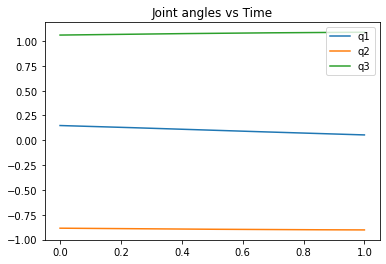

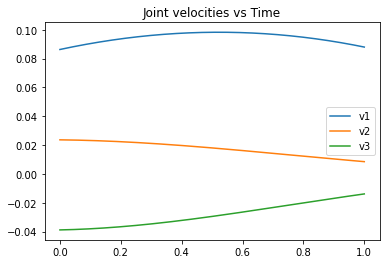

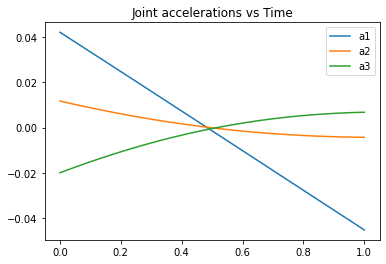

In [25]:
m1 = m2 = m3 = 0.8
m = [m1, m2, m3]
l1 = l2 = l3 = 0.25
l = [l1, l2, l3]
q1_all = []
q2_all = []
q3_all = []
v1_all = []
v2_all = []
v3_all = []
a1_all = []
a2_all = []
a3_all = []
#q
#q_dot
#q_dotdot
#pos = [0]*3

#PUMA_invdynamics([2,2,2], [0.5,0.3,0.3], [0.4,0.4,0.4],[0.1,0.1,0.1], [3,4,5])
#pos[0], pos[1], pos[2], J = PUMA_forwkin_and_J([0.45, 0.075, 0.1], l)
#print(pos, J)
#q1, q2, q3 = PUMA_invkin([position_array_x[1], position_array_y[1], position_array_z[1]], l)

for i in range(len(position_array_x)):
  q1, q2, q3 = PUMA_invkin([position_array_x[i], position_array_y[i], position_array_z[i]], l)
  #Joint angles
  q1_all.append(q1)
  q2_all.append(q2)
  q3_all.append(q3)
  q = [q1, q2, q3]

  #PUMA DH Matrix
  Dh = np.matrix([[q1, l1, 0, -np.pi/2],[q2 , 0, -l2, 0],[q3 , 0, -l3, 0]])
  H, J = DH2HnJ(Dh,[])
  #print(J)

  Jv = J[0:3, :]
  #print(Jv, velocity_array_y[5])

  v1, v2, v3 = np.linalg.pinv(Jv)@np.array([velocity_array_x[i], velocity_array_y[i], velocity_array_z[i]])
  #print(v1[0, 0], v2[0, 0], v3[0, 0])
  #Joint velocities
  v1_all.append(v1[0, 0])
  v2_all.append(v2[0, 0])
  v3_all.append(v3[0, 0])

  #Joint accelerations
  #Jv_inv*(ee_acc - dJv/del_t*ee_vel)
  if i!= (len(position_array_x) - 1):
    q1_next, q2_next, q3_next = PUMA_invkin([position_array_x[i + 1], position_array_y[i + 1], position_array_z[i + 1]], l)
    Dh_next = np.matrix([[q1_next, l1, 0, -np.pi/2],[q2_next , 0, -l2, 0],[q3_next, 0, -l3, 0]])
    H_next, J_next = DH2HnJ(Dh_next,[])
    Jv_next = J_next[0:3, :]
    dt = time_vector[i + 1] - time_vector[i]

    acc = np.linalg.pinv(Jv_next)@(np.array([acceleration_array_x[i], acceleration_array_y[i], acceleration_array_z[i]]) - ((Jv_next - Jv)/dt)@np.array([velocity_array_x[i], velocity_array_y[i], velocity_array_z[i]]))
    a1_all.append(acc[0, 0])
    a2_all.append(acc[1, 0])
    a3_all.append(acc[2, 0])

  #a1, a2, a3 = PUMA_invdynamics(m, l, [q1, q2, q3], [v1, v2, v3], [1, 1, 1])

  #a1_all.append(a1)
  #a2_all.append(a2)
  #a3_all.append(a3)

a1_all.append(acc[0, 0])
a2_all.append(acc[1, 0])
a3_all.append(acc[2, 0])

plot_pos_vs_time(time_vector, q1_all, q2_all, q3_all, 'q1', 'q2', 'q3', 'Joint angles vs Time')
plot_pos_vs_time(time_vector, v1_all, v2_all, v3_all, 'v1', 'v2', 'v3', 'Joint velocities vs Time')
plot_pos_vs_time(time_vector, a1_all, a2_all, a3_all, 'a1', 'a2', 'a3', 'Joint accelerations vs Time')

# Question 3a
Implement the four controllers listed below with the above desired trajectories and compare the results by plotting the desired x-coordinate with respect to time along with the actual x-coordinate of end-effector with respect to time for all four control choice (all superimposed on the same graph). Please label and provide legend for the plots. Show similar plots for y-coordinate of the end-effector with respect to time, and similarly x-y coordinates on x-y plane.\
a. PD control that might yield a small (but non-zero) steady-state error and a damping ratio close to 1.\
b. Same PD control along with a feedforward control using motor dynamics (equation 7.6.6 in the textbook).\
c. Same PD control along with a feedforward disturbance cancellation using computed torque method (equation 7.6.9 in the textbook).\
d. Multivariable control using the approach in section 8.3 (inverse dynamics).

In [25]:
#Ongoing | Code is not complete yet. 

In [11]:
#Code Credits: Videh Patel 

def DH2HnJ(Hmat, prismatic=[]):
    #Hmat is the DH parameter matrix
    #prismatic is an array of the joints that are prismatic: Joint corresponding to qi is ith joint
    #All revolute and prismatic axes are assumed to be aligned with the respective z axis

    def d_(k):
        #Returns position vector of ee wrt k-frame in o-frame basis
        return (T[k][:3,:3])@(np.linalg.inv(T[k])@T[n]@(np.matrix([[0],[0],[0],[1]])))[:3,0]
        
    n = len(Hmat)
    T = [np.matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])]  #Array of all absolute Homogeneous Transformations : Has T0_0 at the start (Identity matrix)
    J = []  #Manipulator Jacobian
    for params in Hmat:
        theta, d, a, alpha = np.array(params)[0]
        Ti = np.matrix([ [ np.cos(theta), -np.sin(theta)*np.cos(alpha), np.sin(theta)*np.sin(alpha), a*np.cos(theta)],\
                         [ np.sin(theta), np.cos(theta)*np.cos(alpha), -np.cos(theta)*np.sin(alpha), a*np.sin(theta)],\
                         [ 0            , np.sin(alpha)               , np.cos(alpha)              , d              ],\
                         [ 0            , 0                           , 0                          ,1              ] ])
        

        T.append(T[-1]@Ti)

    for i in range(n):
        if (i+1) in prismatic:
            Jv = T[i][:3,:3]@np.matrix([0,0,1]).T
            Jw = np.matrix([0,0,0]).T
        else: #Revolute
            Jw = T[i][:3,:3]@np.matrix([0,0,1]).T
            Jv = np.matrix(np.cross(Jw.T,d_(i).T).T)
        
        Ji = np.concatenate((Jv, Jw))
        
        if len(J) == 0:
            J = Ji
        else:
            J = np.concatenate((J,Ji), axis = 1)

        H = T[n]

    return H

In [12]:
def PUMA_invkin(p, dimensions):
  l1, l2, l3 = dimensions
  x, y, z = p

  theta1 = np.arctan(y/x)
  D = (x**2 + y**2 + (z - l1)**2  - l2**2 - l3**2)/(2*l2*l3)
  theta3 = np.arccos(D)
  theta2 = np.arctan((z - l1)/np.sqrt(x**2 + y**2)) - np.arctan(l3*np.sin(theta3)/(l2 + l3*np.cos(theta3)))

  return theta1, theta2, theta3
  
def PUMA_forwkin(q, dimensions):
  q1, q2, q3 = q
  l1, l2, l3 = dimensions
  
  Dh = np.matrix([[q1, l1, 0, -np.pi/2],[q2 , 0, l2, 0],[q3 , 0, l3, 0]])
  H = DH2HnJ(Dh,[])

  return H[0, -1], H[1, -1], H[2, -1]

In [13]:
def PUMA_Dmat(m, l):
  m1, m2, m3 = m
  l1, l2, l3 = l
  q1 = sym.Symbol('q1')
  q2 = sym.Symbol('q2')
  q3 = sym.Symbol('q3')
  q1_dot = sym.Symbol('q1_dot')
  q2_dot = sym.Symbol('q2_dot')
  q3_dot = sym.Symbol('q3_dot')
  q1_dotdot = sym.Symbol('q1_dotdot')
  q2_dotdot = sym.Symbol('q2_dotdot')
  q3_dotdot = sym.Symbol('q3_dotdot')

  Jvc1 = np.array([[0, 0, 0],
                   [0, 0, 0], 
                   [0, 0, 0]])
  Jw1 = np.array([[0, 0, 0], 
                  [0, 0, 0],
                  [1, 0, 0]])
  
  Jvc2 = np.array([[(-l2/2)*sym.sin(q1)*sym.cos(q2), (-l2/2)*sym.cos(q1)*sym.sin(q2), 0],
          [(l2/2)*sym.cos(q1)*sym.cos(q2), (-l2/2)*sym.sin(q1)*sym.sin(q2), 0],
          [0, (l2/2)*sym.cos(q2), 0]])
  Jw2 = np.array([[0, 0, 0],
         [0, 1, 0],
         [1, 0, 0]])
  
  Jvc3 = np.array([[-l2*sym.sin(q1)*sym.cos(q2) - (l3/2)*sym.sin(q1)*sym.cos(q3 + q2), -l2*sym.cos(q1)*sym.sin(q2) - (l3/2)*sym.sin(q3 + q2)*sym.cos(q1), (-l3/2)*sym.sin(q3 + q2)*sym.cos(q1)],
                  [l2*sym.cos(q1)*sym.cos(q2) + (l3/2)*sym.cos(q1)*sym.cos(q3 + q2), -l2*sym.sin(q1)*sym.sin(q2) - (l3/2)*sym.sin(q3 + q2)*sym.sin(q1), (-l3/2)*sym.sin(q3 + q2)*sym.sin(q1)],
                  [0, l2*sym.cos(q2) + (l3/2)*sym.cos(q2+q3), (l3/2)*sym.cos(q2+q3)]])
  Jw3 = np.array([[0, 0, 0],
         [0, 1, 1],
         [1, 0, 0]])
  
  D = m1*Jvc1.T*Jvc1 + m2*Jvc2.T*Jvc2 + m3*Jvc3.T*Jvc3 #+ Jw1.T*R1*I1*R1.T*Jw1  + Jw2.T*R2*I2*R2.T*Jw2 + Jw3.T*R3*I3*R3.T*Jw3

  return D

In [14]:
def PUMA_dynamic_equation(m, l):
  l1, l2, l3 = l
  m1, m2, m3 = m
  q1 = sym.Symbol('q1')
  q2 = sym.Symbol('q2')
  q3 = sym.Symbol('q3')
  q = np.array([[q1], [q2], [q3]])
  q1_dot = sym.Symbol('q1_dot')
  q2_dot = sym.Symbol('q2_dot')
  q3_dot = sym.Symbol('q3_dot')
  q_dot = np.array([[q1_dot], [q2_dot], [q3_dot]])
  q1_dotdot = sym.Symbol('q1_dotdot')
  q2_dotdot = sym.Symbol('q2_dotdot')
  q3_dotdot = sym.Symbol('q3_dotdot')
  q_dotdot = np.array([[q1_dotdot], [q2_dotdot], [q3_dotdot]])
  g = 9.8

  n = 3

  D = PUMA_Dmat(m, l)
  
  V = m1*g*l1/2 + m2*g*(l1 + ( l2*sym.sin(q2))/2) + m3*g*(l1 + l2*sym.sin(q2) + (l3/2)*sym.sin(q2 + q3))

  G = np.array([[sym.diff(V, q1)],
                [sym.diff(V, q2)],
                [sym.diff(V, q3)]])
  
  C = [0]*n

  for k in range(n):
    for j in range(n):
      for i in range(n):
        C[k]  = (sym.diff(D[k][j], q[i][0]) + sym.diff(D[k][i], q[j][0]) - sym.diff(D[i][j], q[k][0]))
        C[k] = C[k]/2

  C = np.array(C)

  dynamic_eqn = sym.Array(D@q_dotdot + C@q_dot + G) #np.matmul(D,q_dotdot) + np.matmul(C,q_dot) + G
  return dynamic_eqn, D, C, G

eqn, D, C, G = PUMA_dynamic_equation([2,2,2],[0.5,0.3,0.3])

In [15]:
def PUMA_invdynamics(m, l, q, q_dot, torques):
  q1, q2, q3 = q
  q1_dot, q2_dot, q3_dot = q_dot

  eqn, D, C, G = PUMA_dynamic_equation(m, l)

  eqn_numbers = eqn.subs([('q1',q1), ('q2',q2), ('q3',q3), ('q1_dot', q1_dot), ('q2_dot',q2_dot), ('q3_dot',q3_dot)])
  #print(eqn_numbers)

  D_numbers = np.array([[eqn_numbers[0,0].coeff('q1_dotdot'), eqn_numbers[0,0].coeff('q2_dotdot'), eqn_numbers[0,0].coeff('q3_dotdot')],
                [eqn_numbers[1,0].coeff('q1_dotdot'), eqn_numbers[1,0].coeff('q2_dotdot'), eqn_numbers[1,0].coeff('q3_dotdot')],
                [eqn_numbers[2,0].coeff('q1_dotdot'), eqn_numbers[2,0].coeff('q2_dotdot'), eqn_numbers[2,0].coeff('q3_dotdot')]], dtype = 'float')
  #print(D_numbers)
  
 # M = C@q_dot + G
 # K = eqn_numbers - D@np.array([['q1_dotdot'],['q2_dotdot'],['q3_dotdot']])
  K = np.array([[((eqn_numbers[0,0].coeff('q1_dotdot', 0)).coeff('q2_dotdot', 0)).coeff('q3_dotdot', 0)],
                [((eqn_numbers[1,0].coeff('q1_dotdot', 0)).coeff('q2_dotdot', 0)).coeff('q3_dotdot', 0)],
                [((eqn_numbers[2,0].coeff('q1_dotdot', 0)).coeff('q2_dotdot', 0)).coeff('q3_dotdot', 0)]])
  #print(K)
  D_inv = np.linalg.inv(D_numbers)
  M = np.array([[torques[0] - K[0,0]],
                [torques[1] - K[1,0]],
                [torques[2] - K[2,0]]])
  #print(D_inv)
  #print(M)
  q_dotdot = np.array(D_inv@M, dtype = 'float')
  #print(q_dotdot)
  return [q_dotdot[0,0], q_dotdot[1,0], q_dotdot[2,0]]

In [16]:
def dummy_PUMA_invdynamics(t, y):
  #m = [2, 2, 2]
  #l = [0.5, 0.3, 0.3]
  q1, q2, q3 = y[0], y[2], y[4]
  q1_dot, q2_dot, q3_dot = y[1], y[3], y[5]

  eqn, D, C, G = PUMA_dynamic_equation(m, l)

  eqn_numbers = eqn.subs([('q1',q1), ('q2',q2), ('q3',q3), ('q1_dot', q1_dot), ('q2_dot',q2_dot), ('q3_dot',q3_dot)])
  #print(eqn_numbers)

  D_numbers = np.array([[eqn_numbers[0,0].coeff('q1_dotdot'), eqn_numbers[0,0].coeff('q2_dotdot'), eqn_numbers[0,0].coeff('q3_dotdot')],
                [eqn_numbers[1,0].coeff('q1_dotdot'), eqn_numbers[1,0].coeff('q2_dotdot'), eqn_numbers[1,0].coeff('q3_dotdot')],
                [eqn_numbers[2,0].coeff('q1_dotdot'), eqn_numbers[2,0].coeff('q2_dotdot'), eqn_numbers[2,0].coeff('q3_dotdot')]], dtype = 'float')
  #print(D_numbers)
  
 # M = C@q_dot + G
 # K = eqn_numbers - D@np.array([['q1_dotdot'],['q2_dotdot'],['q3_dotdot']])
  K = np.array([[((eqn_numbers[0,0].coeff('q1_dotdot', 0)).coeff('q2_dotdot', 0)).coeff('q3_dotdot', 0)],
                [((eqn_numbers[1,0].coeff('q1_dotdot', 0)).coeff('q2_dotdot', 0)).coeff('q3_dotdot', 0)],
                [((eqn_numbers[2,0].coeff('q1_dotdot', 0)).coeff('q2_dotdot', 0)).coeff('q3_dotdot', 0)]])
  #print(K)
  D_inv = np.linalg.inv(D_numbers)
  M = np.array([[torques[0] - K[0,0]],
                [torques[1] - K[1,0]],
                [torques[2] - K[2,0]]])
  #print(D_inv)
  #print(M)
  q_dotdot = np.array(D_inv@M, dtype = 'float')
  #print(q_dotdot)
  return [q_dot[0], q_dotdot[0,0], q_dot[1], q_dotdot[1,0], q_dot[2], q_dotdot[2,0]]


q =  [0.7853981633974483, -1.1138622802514613, 1.3467032344935257]
qd =  [0.982793723247329, -1.1679944725267064, 1.7948894190962674]
0


/usr/local/lib/python3.7/dist-packages/scipy/integrate/_ode.py:1009: UserWarning: vode: Excess work done on this call. (Perhaps wrong MF.)
  self.messages.get(istate, unexpected_istate_msg)))


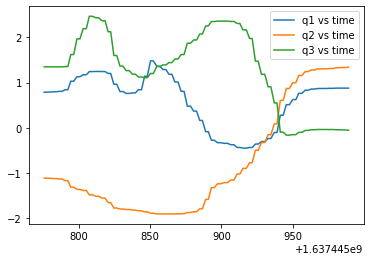

In [17]:
m1 = m2 = m3 = 0.8
m = [m1, m2, m3]
l1 = l2 = l3 = 0.25
l = [l1, l2, l3]
A = [0.3, 0.3, 0.3]
B = [0.2 , 0.3, 0.4]

q1_A, q2_A, q3_A = PUMA_invkin(A, l)
q1_B, q2_B, q3_B = PUMA_invkin(B, l)

q = [q1_A, q2_A, q3_A]
qd = [q1_B, q2_B, q3_B]
print('q = ', q)
print('qd = ', qd)

q_dot = [0, 0, 0]

kp = 100
ki = 50

ode_eqn = ode(dummy_PUMA_invdynamics).set_integrator('vode', nsteps=5, method='bdf')
ode_eqn.set_initial_value([q1_A, 0, q2_A, 0, q3_A, 0], t = 0)
print(ode_eqn.t)
torques = np.array([0, 0, 0])
del_t = 0
loop = 0
q_all1 = []
q_all2 = []
q_all3 = []
q_dot_all1 = []
q_dot_all2 = []
q_dot_all3 = []
time_list = []
while (abs(qd[0] - q[0])>0.001) and (abs(qd[1] - q[1])>0.001) and (abs(qd[2] - q[2])>0.001):
  t = time.time()
  time_list.append(t)

  E = np.array(qd) - np.array(q)
  torques = kp*E + ki*E*del_t

  q_dotdot = PUMA_invdynamics(m, l, q, q_dot, torques)
  q[0], q_dot[0], q[1], q_dot[1], q[2], q_dot[2] = ode_eqn.integrate(ode_eqn.t+1) #DOUBT: ISME TIME KI ARGUMENT ME KYA DAALU?
  #print(q, q_dot)
  q_all1.append(q[0])
  q_all2.append(q[1])
  q_all3.append(q[2])
  q_dot_all1.append(q_dot[0])
  q_dot_all2.append(q_dot[1])
  q_dot_all3.append(q_dot[2])
  

  del_t = time.time() - del_t
  loop = loop + 1
  if loop>100:
    break

plt.plot(time_list, q_all1, label = 'q1 vs time')
plt.plot(time_list, q_all2, label = 'q2 vs time')
plt.plot(time_list, q_all3, label = 'q3 vs time')
plt.legend()